Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.

Before we start - we have to use Python2 (not Python 3), so we should choose this as an option in "Runtime" -> "Change Runtime Type" at the top.

In [1]:
#we are going to make a directory called APPS
!mkdir -p APPS
#Now we move to our directory called APPS and we download ROOT from the CERN server, this version is chosen because it runs on this machine - if you want to run this locally check the versions!
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
#Now we extract our downloaded file:
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz


--2020-03-09 20:48:29--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.2’

root_v6.13.08.Linux 100%[===================>] 131.05M  25.7MB/s    in 5.8s    

2020-03-09 20:48:36 (22.4 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.2’ saved [137415272/137415272]



In [10]:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

<CDLL '/content/APPS/root/lib/libFoam.so', handle 5644c4dbef00 at 7fb5886f4d10>

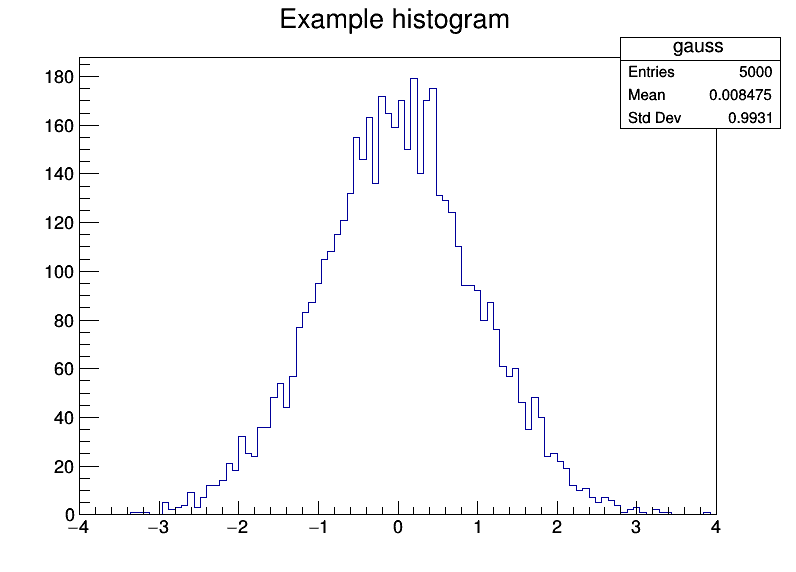

In [11]:
#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data from CERN:

In [12]:
!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root

--2020-03-09 20:50:35--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.185.82.144, 188.184.93.89, 188.184.28.138, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.185.82.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root.3’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  19.0MB/s    in 19s     

2020-03-09 20:50:56 (22.0 MB/s) - ‘B2HHH_MagnetUp.root.3’ saved [444723234/444723234]



[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 3238126 out of range events


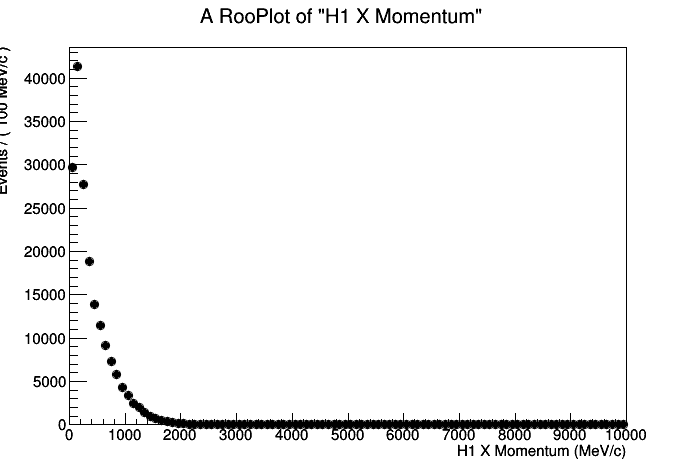

In [13]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",0,10000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",0,10000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",0,10000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. We have to use some detective work to extract the information we need on the original physics process at play.


Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We need to first combine this into a single measurement

In [0]:
import numpy as np
from numpy import *
from math import *

#We need to tell Python what the total momentum is defined as mathematically - do that in this code block:

#Hint: I suggest we define a function which we might want to use later - something like:

def p_tot_daughter(daughter):
  p_tot = "sqrt((" + daughter + "_PX)**2+(" + daughter + "_PY)**2+(" + daughter +"_PZ)**2)" # check if this is correct other wise you will get an error of bad numerical expression
  return p_tot


In [0]:
#setting the particles to particular variables
p1 = "H1"
p2 = "H2"
p3 = "H3"

Now plot the total momentum for one (or more) of the daughter particles.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: 2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: 3


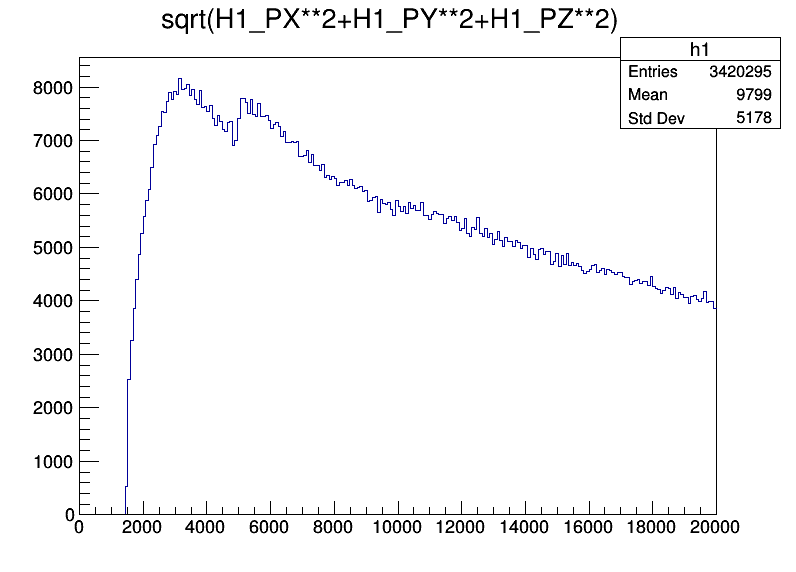

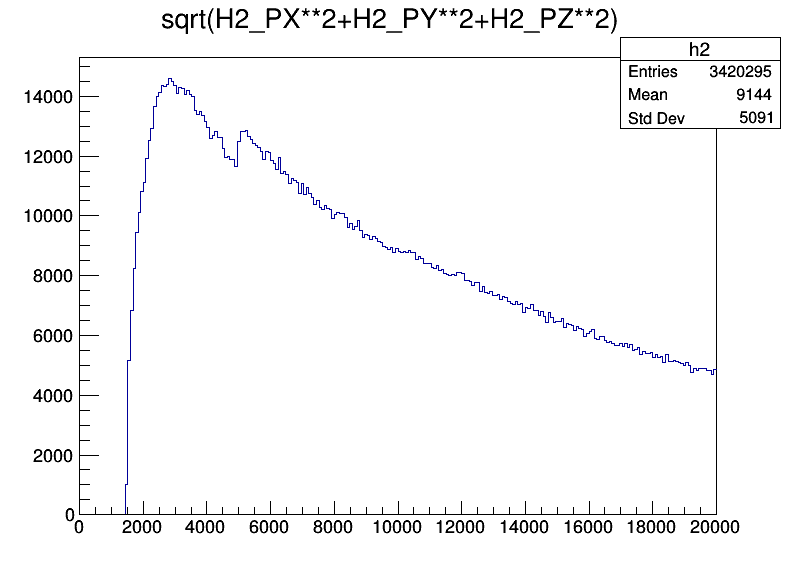

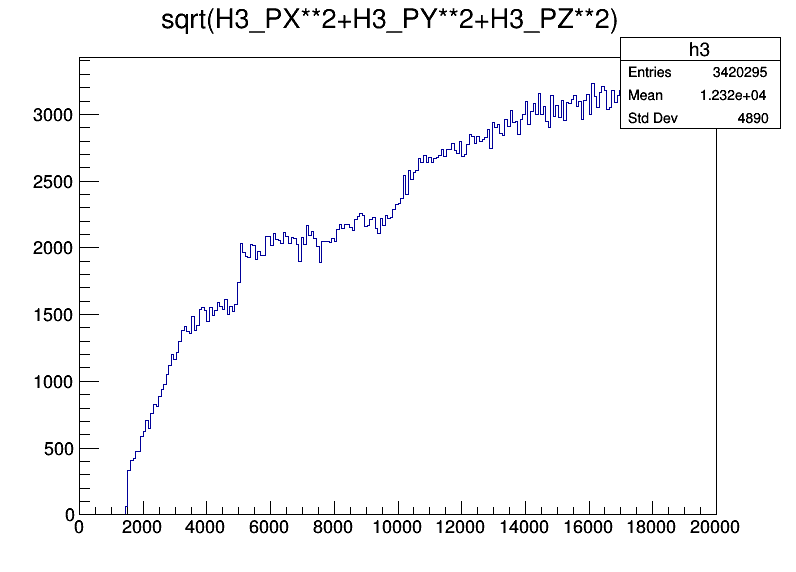

In [14]:

#use the histogram plotting tools, call your function to find the total momentum and then plot it!
#Since we need to use ROOT, we must first import this into Python:
import ROOT
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY") # open file using TFile command
tree=f.Get("DecayTree") # extraction of the decay tree from the file

# Now we create a canvas, plot our data onto the canvas and draw it:

c1 = ROOT.TCanvas("1","P1",800,600) # P1 
tree.Draw("sqrt(H1_PX**2+H1_PY**2+H1_PZ**2)>>h1(250,0,20000)") # needed to be like this, cant open a function from here without calling it back
H1 = ROOT.gDirectory.Get("H1")
c1.Draw()

c2 = ROOT.TCanvas("2","P2",800,600) # P2
tree.Draw("sqrt(H2_PX**2+H2_PY**2+H2_PZ**2)>>h2(250,0,20000)") # needed to be like this, cant open a function from here without calling it back
H2 = ROOT.gDirectory.Get("H2")
c2.Draw()

c3 = ROOT.TCanvas("3","P2",800,600) # P3 
tree.Draw("sqrt(H3_PX**2+H3_PY**2+H3_PZ**2)>>h3(250,0,20000)") # needed to be like this, cant open a function from here without calling it back
H3 = ROOT.gDirectory.Get("H3")
c3.Draw()

The next step is to use the total momentum of the Kaon and its invarient mass (found with a small amount of research) and your relativity knowledge to get an equation for the energy of the Kaon. 

In [0]:

m_Kaon = 493.677 # mass of a kaon in meV/c^2 

def e_Kaon(daughter):
  e_Kaon = "sqrt("+str(p_tot_daughter(daughter))+"**2 +("+str(m_Kaon)+")**2)"        # in (meV/c) as a string so its readable for the program that does the calulations
  return e_Kaon
  

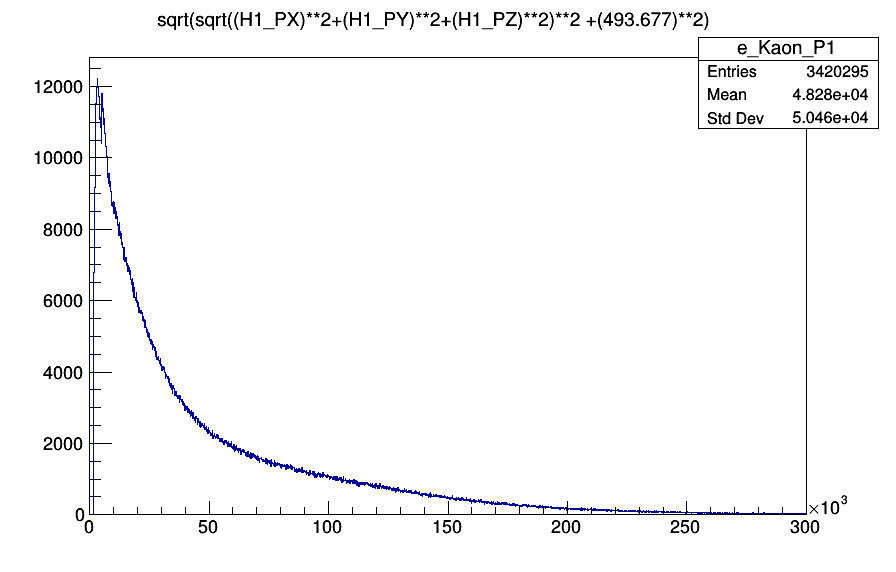

In [16]:
e_Kaon1 = ROOT.TCanvas("Kaon_P1","Energy",900,600)
tree.Draw(e_Kaon(p1)+">>e_Kaon_P1(2500,0,300000)") # set to 2500 for enough detail but not to much to make it unreadable
e_Kaon_P1 = ROOT.gDirectory.Get("e_Kaon_P1")
e_Kaon1.Draw()

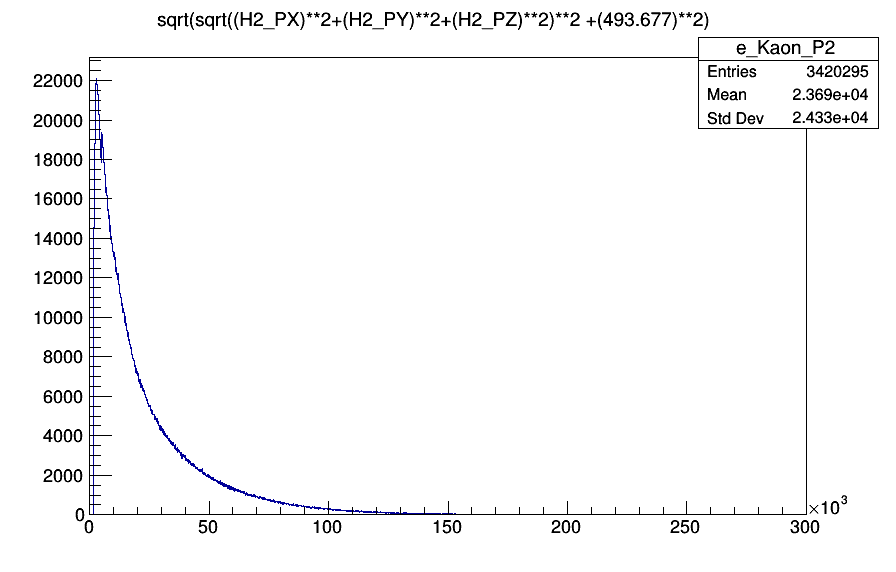

In [17]:
e_Kaon2 = ROOT.TCanvas("Kaon_P2","Energy",900,600)
tree.Draw(e_Kaon(p2)+">>e_Kaon_P2(2500,0,300000)")
e_Kaon_P2 = ROOT.gDirectory.Get("e_Kaon_P2")
e_Kaon2.Draw()

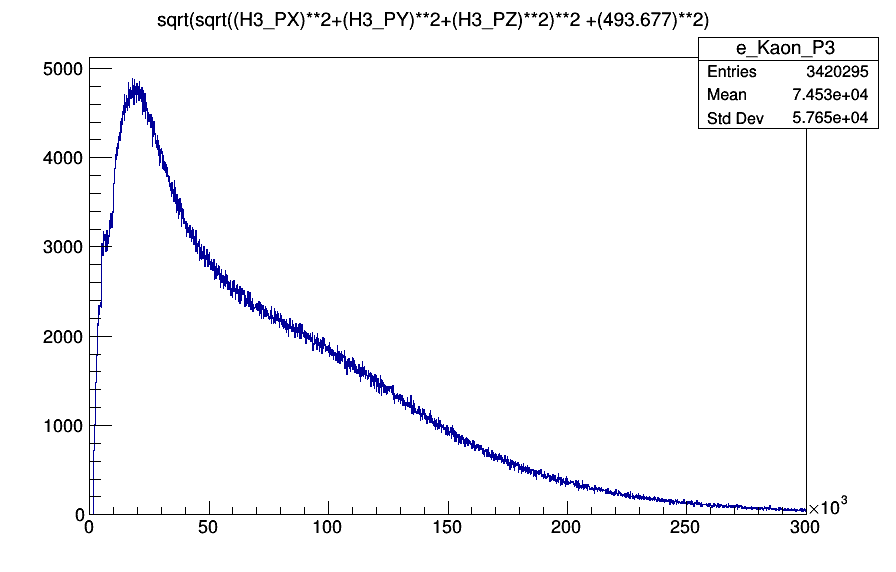

In [18]:
e_Kaon3 = ROOT.TCanvas("Kaon_P3","Energy",900,600)
tree.Draw(e_Kaon(p3)+">>e_Kaon_P3(2500,0,300000)")
e_Kaon_P3 = ROOT.gDirectory.Get("e_Kaon_P3")
e_Kaon3.Draw()

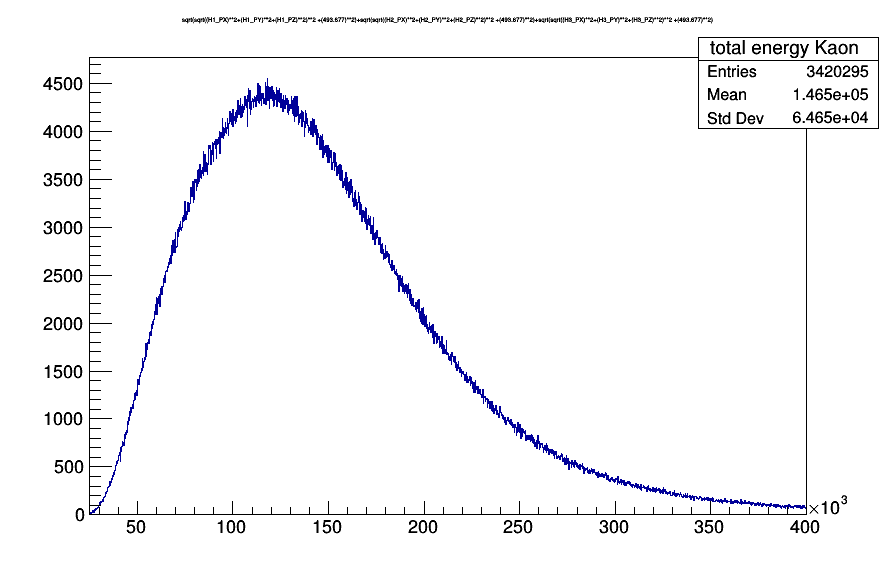

In [19]:
e_Kaon_tot = ROOT.TCanvas("total energy","Energy",900,600)
tree.Draw((e_Kaon(p1)+"+"+e_Kaon(p2)+"+"+e_Kaon(p3))+">>total energy Kaon(2000,25000,400000)")
e_Kaon_total = ROOT.gDirectory.Get("e_Kaon_total")
e_Kaon_tot.Draw()

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B+ or our B-

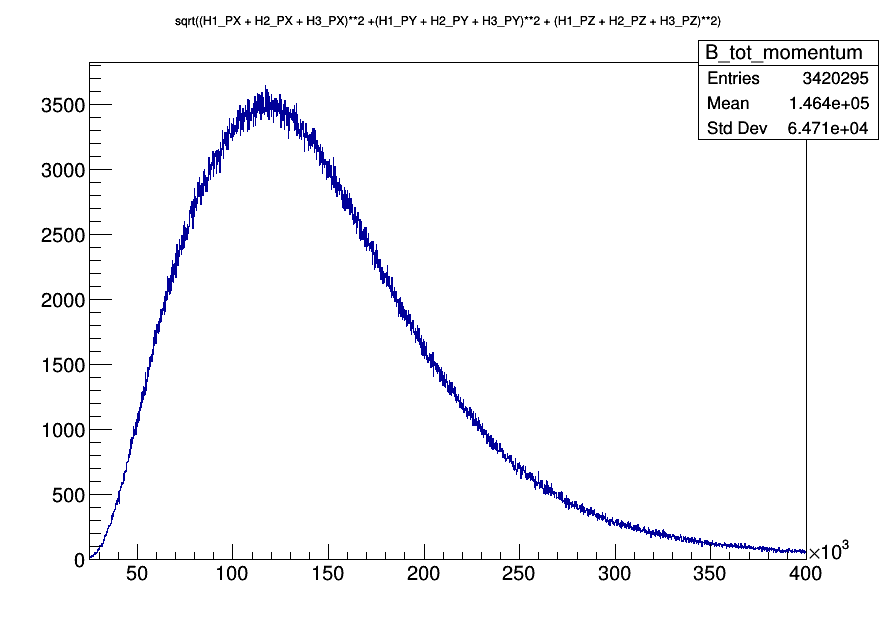

In [20]:
B_meson_x_momentum = "H1_PX + H2_PX + H3_PX"
B_meson_y_momentum = "H1_PY + H2_PY + H3_PY"
B_meson_z_momentum = "H1_PZ + H2_PZ + H3_PZ"
B_meson_total_momentum = "sqrt(("+B_meson_x_momentum+")**2 +("+B_meson_y_momentum+")**2 + ("+B_meson_z_momentum+")**2)"

B_tot_momentum = ROOT.TCanvas("B_momentum","momemtum",900,650)
tree.Draw((B_meson_total_momentum)+">>B_tot_momentum(2500,25000,400000)")
B_mesontotalmomentum = ROOT.gDirectory.Get("B_tot_mom")
B_tot_momentum.Draw()

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we used earlier for the Kaon calculations).
When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


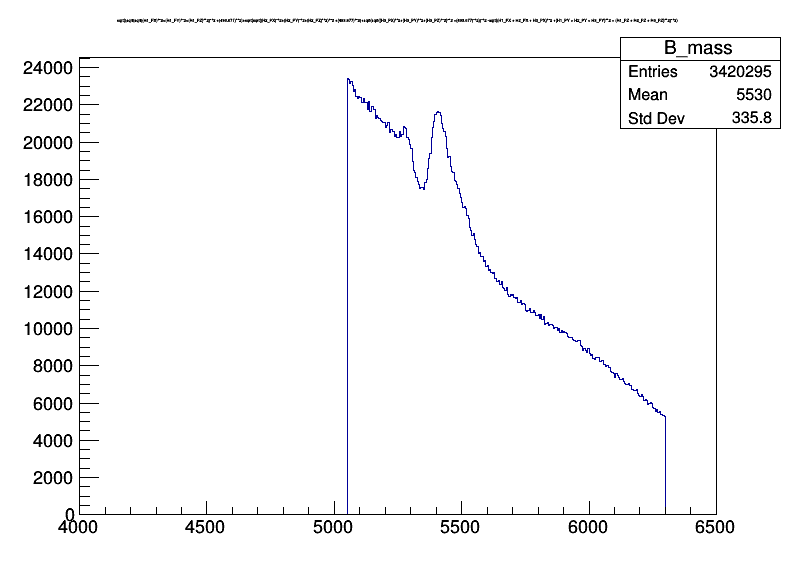

In [82]:
def get_total_energy():
  total_energy = "("+e_Kaon(p1) + "+" +  e_Kaon(p2) +  "+" +e_Kaon(p3)+")"
  return total_energy

def get_B_mass():
  return "sqrt("+total_energy+"**2 -"+B_meson_total_momentum+"**2)"

u=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw(get_B_mass()+">>B_mass(500,4000,6500)")
u.Draw()

Our mean is not close to the theoretical value of 5279.61 meV/c^2. Further clearing of data is needed.


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


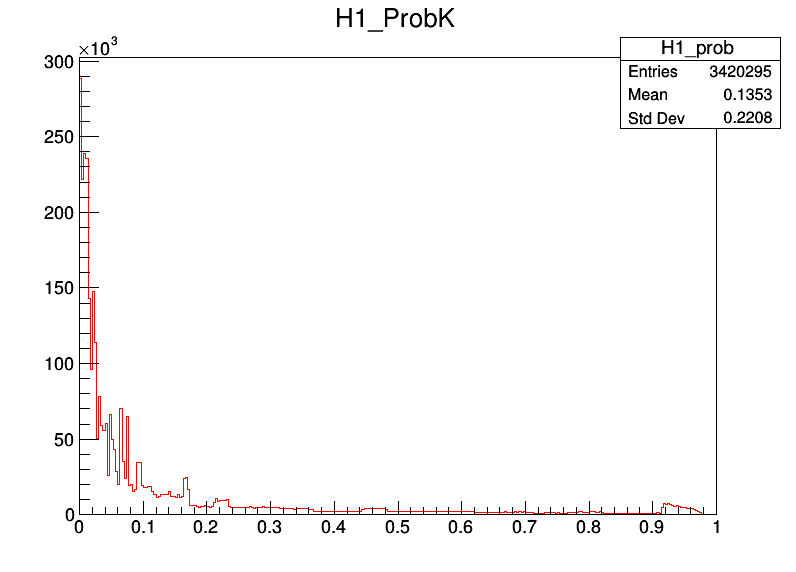

In [88]:
t=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("H1_ProbK>>H1_prob(300,0,1)")
h1 = ROOT.gDirectory.Get("H1_prob")
h1.SetLineColor(2)
h1.Draw()
t.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


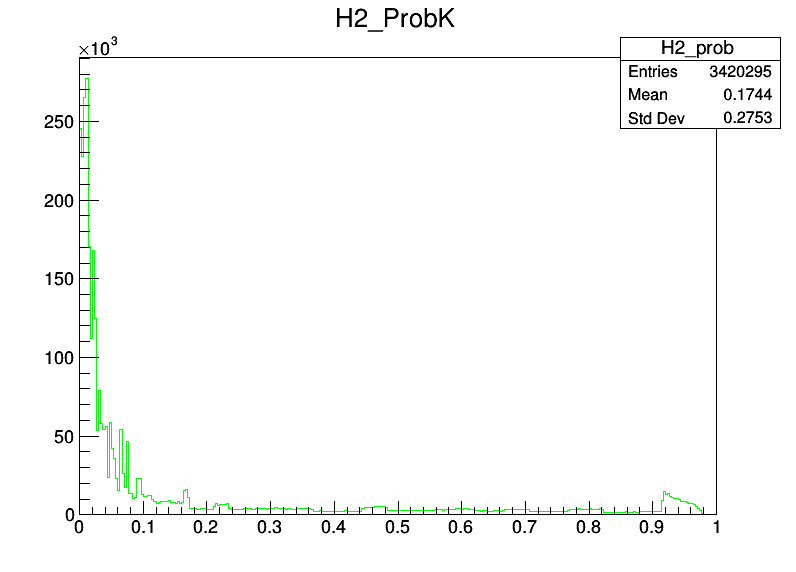

In [89]:
t=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("H2_ProbK>>H2_prob(300,0,1)")
h2 = ROOT.gDirectory.Get("H2_prob")
h2.SetLineColor(3)
h2.Draw()
t.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


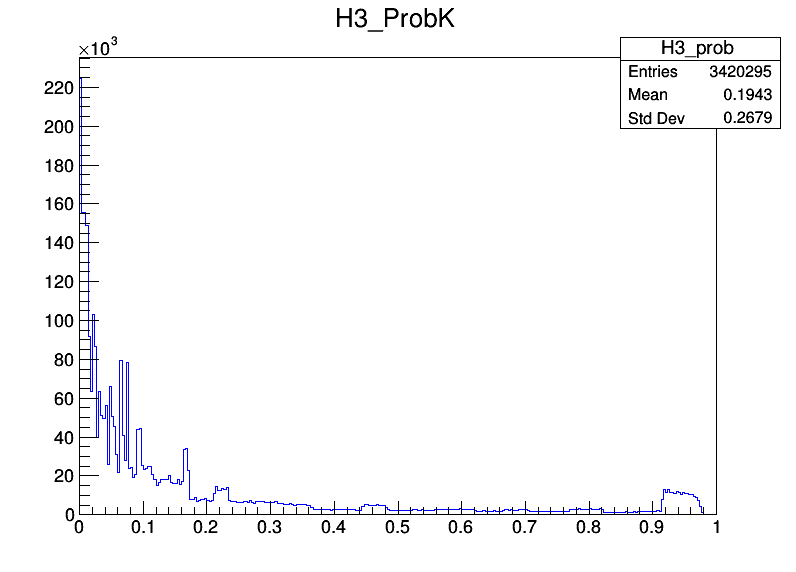

In [99]:
t=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("H3_ProbK>>H3_prob(300,0,1)")
h3 = ROOT.gDirectory.Get("H3_prob")
h3.SetLineColor(4)
h3.Draw()
t.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


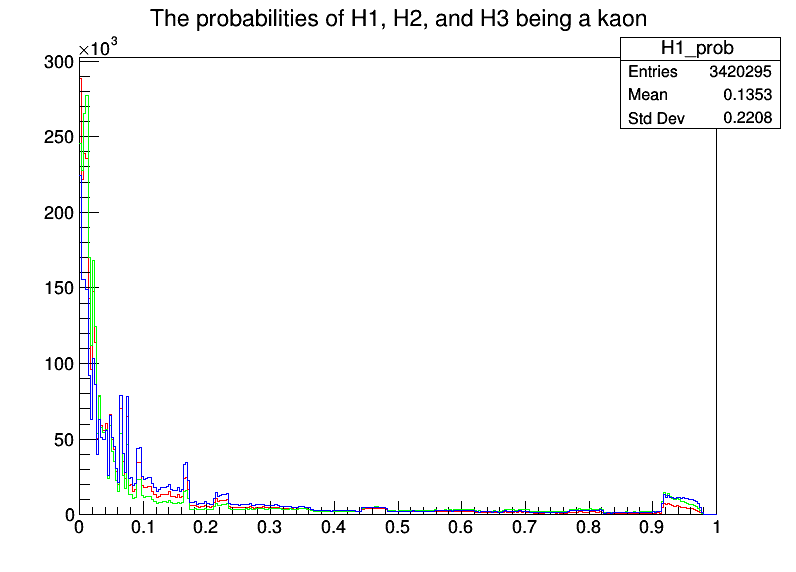

In [92]:
t=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("H1_ProbK>>H1_prob(300,0,1)") # range between 0 and 1
tree.Draw("H2_ProbK>>H2_prob(300,0,1)")
tree.Draw("H3_ProbK>>H3_prob(300,0,1)")
h1 = ROOT.gDirectory.Get("H1_prob")
h2 = ROOT.gDirectory.Get("H2_prob")
h3 = ROOT.gDirectory.Get("H3_prob")
h1.SetLineColor(2)#red
h1.Draw()
h1.SetTitle("The probabilities of H1, H2, and H3 being a kaon")
h2.SetLineColor(3)#green
h2.Draw('same')
h3.SetLineColor(4)#blue
h3.Draw('same')
t.Draw()

I couldnt figure out how to get all three legends in one histogramm, hence i seperated them before to get the mean values of each of the three particles beeing a kaon. H1 = 13.53% ; H2 = 17.44% ; H3 = 19.43%

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


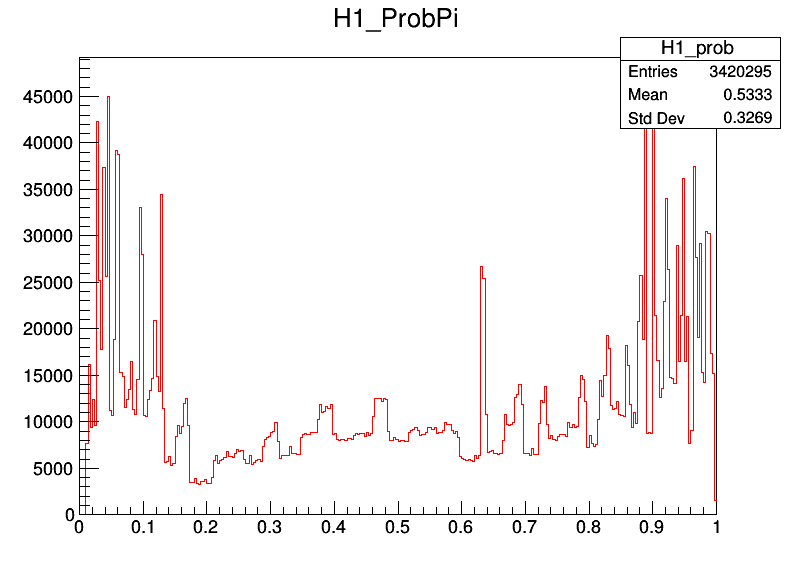

In [94]:
t=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("H1_ProbPi>>H1_prob(300,0,1)")
h1 = ROOT.gDirectory.Get("H1_prob")
h1.SetLineColor(2)
h1.Draw()
t.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


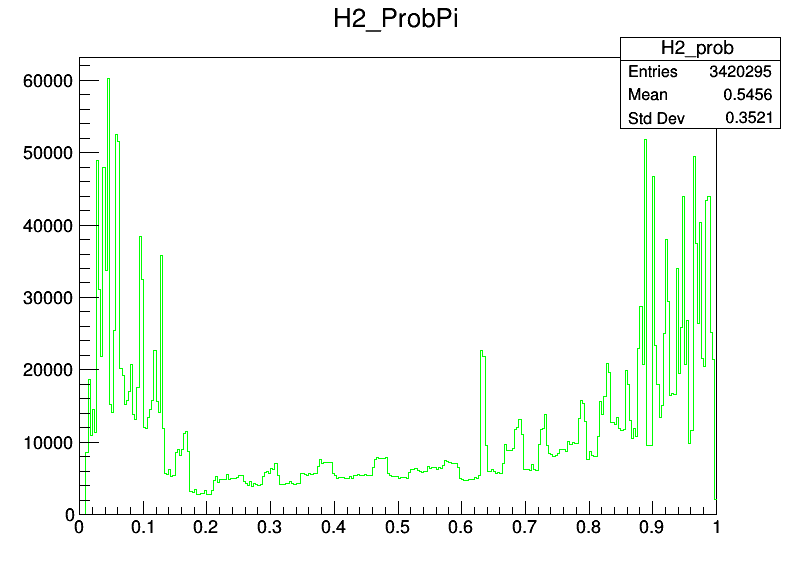

In [96]:
t=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("H2_ProbPi>>H2_prob(300,0,1)")
h2 = ROOT.gDirectory.Get("H2_prob")
h2.SetLineColor(3)
h2.Draw()
t.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


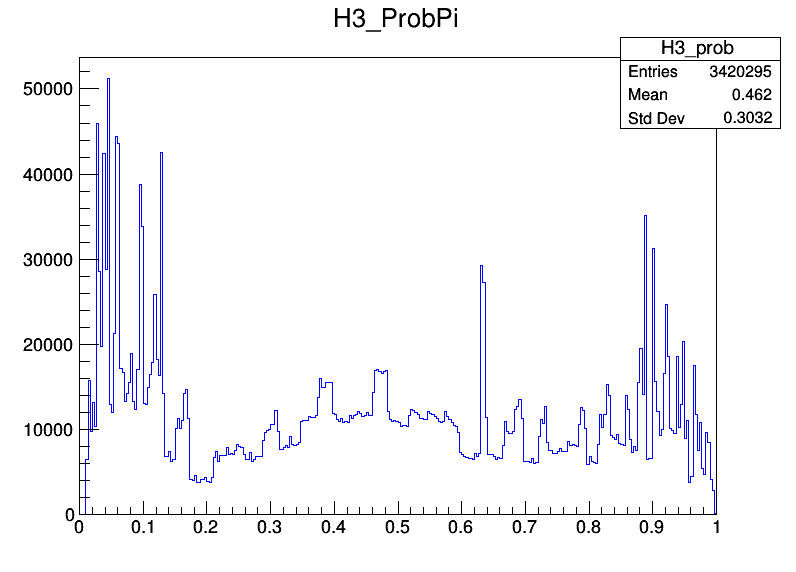

In [100]:
t=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("H3_ProbPi>>H3_prob(300,0,1)")
h3 = ROOT.gDirectory.Get("H3_prob")
h3.SetLineColor(4)
h3.Draw()
t.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


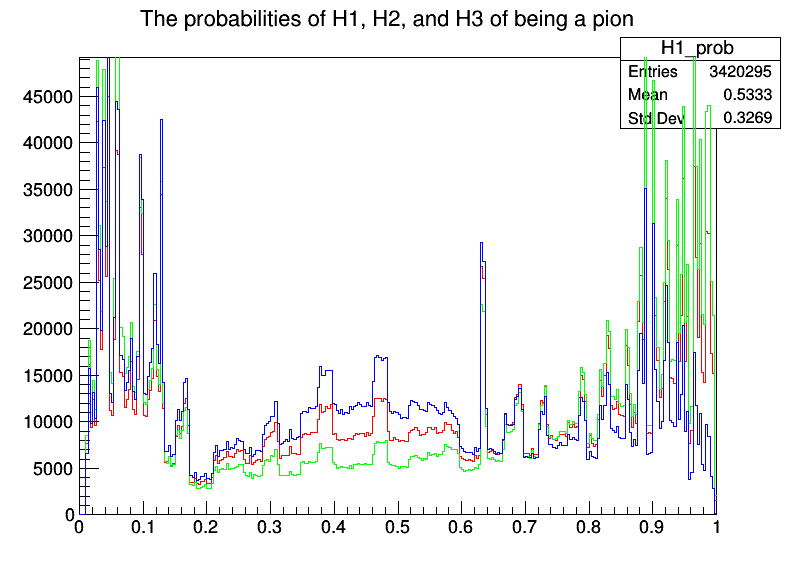

In [84]:
t=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("H1_ProbPi>>H1_prob(300,0,1)")
tree.Draw("H2_ProbPi>>H2_prob(300,0,1)")
tree.Draw("H3_ProbPi>>H3_prob(300,0,1)")
h1 = ROOT.gDirectory.Get("H1_prob")
h2 = ROOT.gDirectory.Get("H2_prob")
h3 = ROOT.gDirectory.Get("H3_prob")
h1.SetLineColor(2)
h1.Draw()
h1.SetTitle("The probabilities of H1, H2, and H3 of being a pion")
h2.SetLineColor(3)
h2.Draw('same')
h3.SetLineColor(4)
h3.Draw('same')
t.Draw()

Same goes for the probability of being a pion. H1 = 53.33% ; H2 = 54.56% ; H3 = 46.2%

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


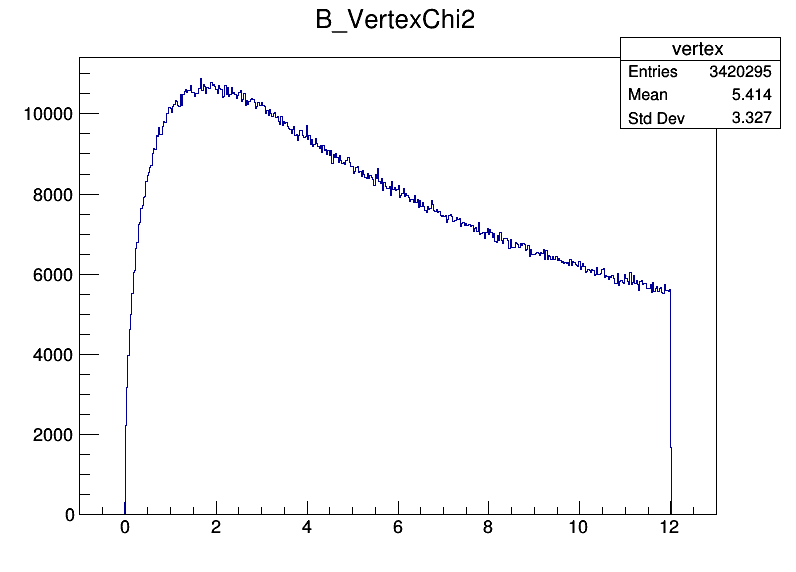

In [106]:
#For all the particles, make a plot of the B_VertexChi2
b=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("B_VertexChi2"+">>vertex(500,-1,13)")
vertex = ROOT.gDirectory.Get("vertex")
b.Draw()

In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision. Using these plots from earlier we can construct a preselection string. This is a text string that looks like:

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


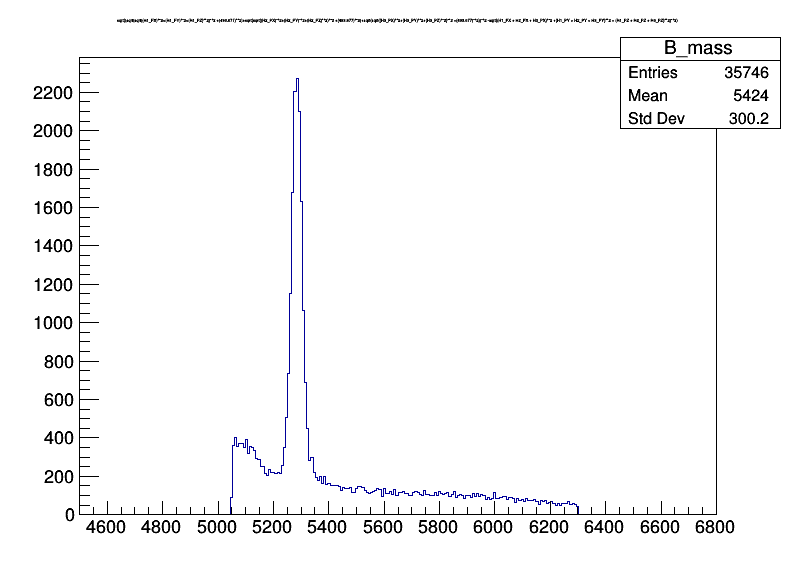

In [126]:
selection=("H1_ProbK>0.15&H1_ProbPi<0.55&H2_ProbK>0.18&H2_ProbPi<0.55&H3_ProbK>0.2&H1_ProbPi<0.47&!H1_isMuon")
CutTree=tree.CopyTree(selection)
t=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
CutTree.Draw(get_B_mass()+">>B_mass(300,4500,6800)")
mass_histo = ROOT.gDirectory.Get("B_mass")
t.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName
Error in <TSelectorDraw::Begin>: Two open or close brackets found, hname=h2(100,0,70)0)


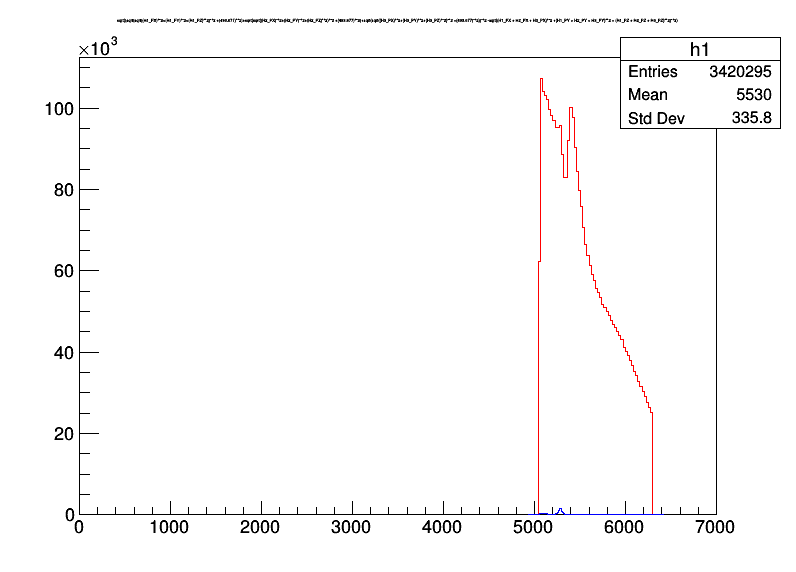

In [124]:
t=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw(get_B_mass()+">>h1(300,0,7000)")
CutTree.Draw(get_B_mass()+">>h2(100,0,70)0)") # extra 0) to have both histograms under each other
h1 = ROOT.gDirectory.Get("h1")
h2 = ROOT.gDirectory.Get("h2")
h1.SetLineColor(2)
h1.Draw()
h2.SetLineColor(4)
h2.Draw('same')
t.Draw()

With the selection active there is already a big improvement in the accuracy for the B meson mass. The data size is now significantly smaller. Changing the selection string could further increase accuracy.

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:
Gaussian+Exp Background
Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.
In order to do this, we need to build a fit model, around which the software can try to fit our data.
We use RooFit for this, which includes:
Gaussian
Exponential
Chebychev
Crystal Ball
Breit-Wigner
As well as several other choices.
Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

This is as far as the working code for the mass of the B meson goes. I had many errors within the next codeblocks regarding the ROOT.RooRealVar which i could only work around by adding a equal sign in front of the parentheses. Though this is only a workaround and I am not even sure why it worked... Though it did not matter to much because the rest of the code throws out even more errror messages.


In [138]:
#First we define our physical measurement we want to fit using the RooRealVar
# variable=ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
mass = ROOT.RooRealVar=("B_Mass", "Mass", 4500, 6800, "MeV/C^{2}")

#The remainder of the variables we need to pass into our model. E.g. for a gaussian, we need a mean and a width parameter to vary
#For these RooRealVar's we add three numbers, a "starting value" and min/max values

gauss_mean=ROOT.RooRealVar=("gauss_mean","Mean",5250,5200,5400)
gauss_width=ROOT.RooRealVar=("gauss_width","Width",5,0,80)

#Now we have enough to make our Model for the signal:

Gauss=ROOT.RooGaussian=("Gaussian Signal","Gauss",mass,gauss_mean,gauss_width)

#We also need a background, so let's use a (simple) exponential:

exponent=ROOT.RooRealVar=("exponent", "C", -0.02, -2, +2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential=("Exponential Background","Bkgnd",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add a scaling factor to fit what ratio of the two are used:

sig_frac=ROOT.RooRealVar=("Signal Fraction","sigfrac", 0.5, 0, 1)

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),sig_frac)

TypeError: ignored

In [120]:
#Put our data set into a RooDataSet structure

data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", CutTree, mass)

#Then we can do the fitting:

model.fitTo(data_to_fit)

#if everything went well, you will see the outputs of RooFit below

TypeError: ignored

In [121]:
#Now to plot it all
c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c1.Update()

AttributeError: ignored

Code from Felix; did not have enough time and just wanted to check if my results are correct so far.

In [139]:
# split the sets into 2*K- 1*K+ vs 1*K- 2*K+
selectionBPos=("(H1_Charge==1&H2_Charge==1&H3_Charge==-1)||(H1_Charge==1&H2_Charge==-1&H3_Charge==1)||(H1_Charge==-1&H2_Charge==1&H3_Charge==1)")
selectionBNeg=("(H1_Charge==-1&H2_Charge==-1&H3_Charge==1)|(H1_Charge==-1&H2_Charge==1&H3_Charge==-1)|(H1_Charge==1&H2_Charge==-1&H3_Charge==-1)")
treeBPos=CutTree.CopyTree(selectionBPos)
treeBNeg=CutTree.CopyTree(selectionBNeg)

# gets amount of entires per tree
n_B_Pos = float(CutTree.GetEntries(selectionBPos))
n_B_Neg = float(CutTree.GetEntries(selectionBNeg))
print(n_B_Pos)
print(n_B_Neg)

18523.0
17223.0


In [140]:
# do calculatioins to find confidence interval
A = (n_B_Neg-n_B_Pos)/(n_B_Neg+n_B_Pos)
print(A)
sigmaA = math.sqrt((1-A**2)/(n_B_Neg+n_B_Pos))
print(sigmaA)
print("5 stdev range:", A-5*sigmaA, "to", A+5*sigmaA)

# This means that we cannot confirm a CP violation here - 0 (same amount of
# matter and antimatter) is within our confidence interval

-0.0363677054775
0.00528565585673
('5 stdev range:', -0.06279598476119069, 'to', -0.009939426193881197)
